# Support Vector Machines

SVM is a powerful supervised machine learning algorithm. There are many hyperplanes that separate the positive points from negative points so the one which separates positive points from negative points as far away as possible will be preferred. This hyperplane is called the margin maximizing hyperplane. First, SVM will generate hyperplanes iteratively that segregates the classes in best way. Then, it will choose the hyperplane that separates the classes correctly.<br/>

<img src="https://miro.medium.com/max/1400/1*5GRmR3m6QgnyRbtjMCeMFQ.jpeg" width="400">

## Implementation of SVM:

#### Dataset

The Dataset used for this assignment is the Breast Cancer dataset from Kaggle (https://www.kaggle.com/uciml/breast-cancer-wisconsin-data). This Data set contains the information related to the diagnosis of cancer.<br/>
Number of Instances: 569<br/>
Missing values: NA<br/>
Number of Attributes: 32<br/>
Class distribution: 357 benign, 212 malignant<br/>

Ten real-valued features are computed for each cell nucleus:<br/>
a) radius (mean of distances from center to points on the perimeter)<br/>
b) texture (standard deviation of gray-scale values)<br/>
c) perimeter<br/>
d) area<br/>
e) smoothness (local variation in radius lengths)<br/>
f) compactness (perimeter^2 / area - 1.0)<br/>
g) concavity (severity of concave portions of the contour)<br/>
h) concave points (number of concave portions of the contour)<br/>
i) symmetry<br/>
j) fractal dimension ("coastline approximation" - 1)<br/>

Output variable :<br/>
Diagnosis (M = malignant, B = benign)<br/>

#### Import the necessary libraries

In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#### Read the csv file

In [106]:
df = pd.read_csv('breast-cancer.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [107]:
#drop last column (extra column added by pd) and unnecessary first column (id)
df.drop(df.columns[[-1, 0]], axis=1, inplace=True)

#### Applying feature engineering

In [108]:
d = {'M': 1.0, 'B': -1.0}
df['diagnosis'] = df['diagnosis'].map(d)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1.0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1.0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1.0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1.0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [109]:
#checking for missing values
df.isna().any().any()

False

In [110]:
# Overall statistics
df.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,-0.254833,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.967836,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,-1.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,-1.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,-1.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


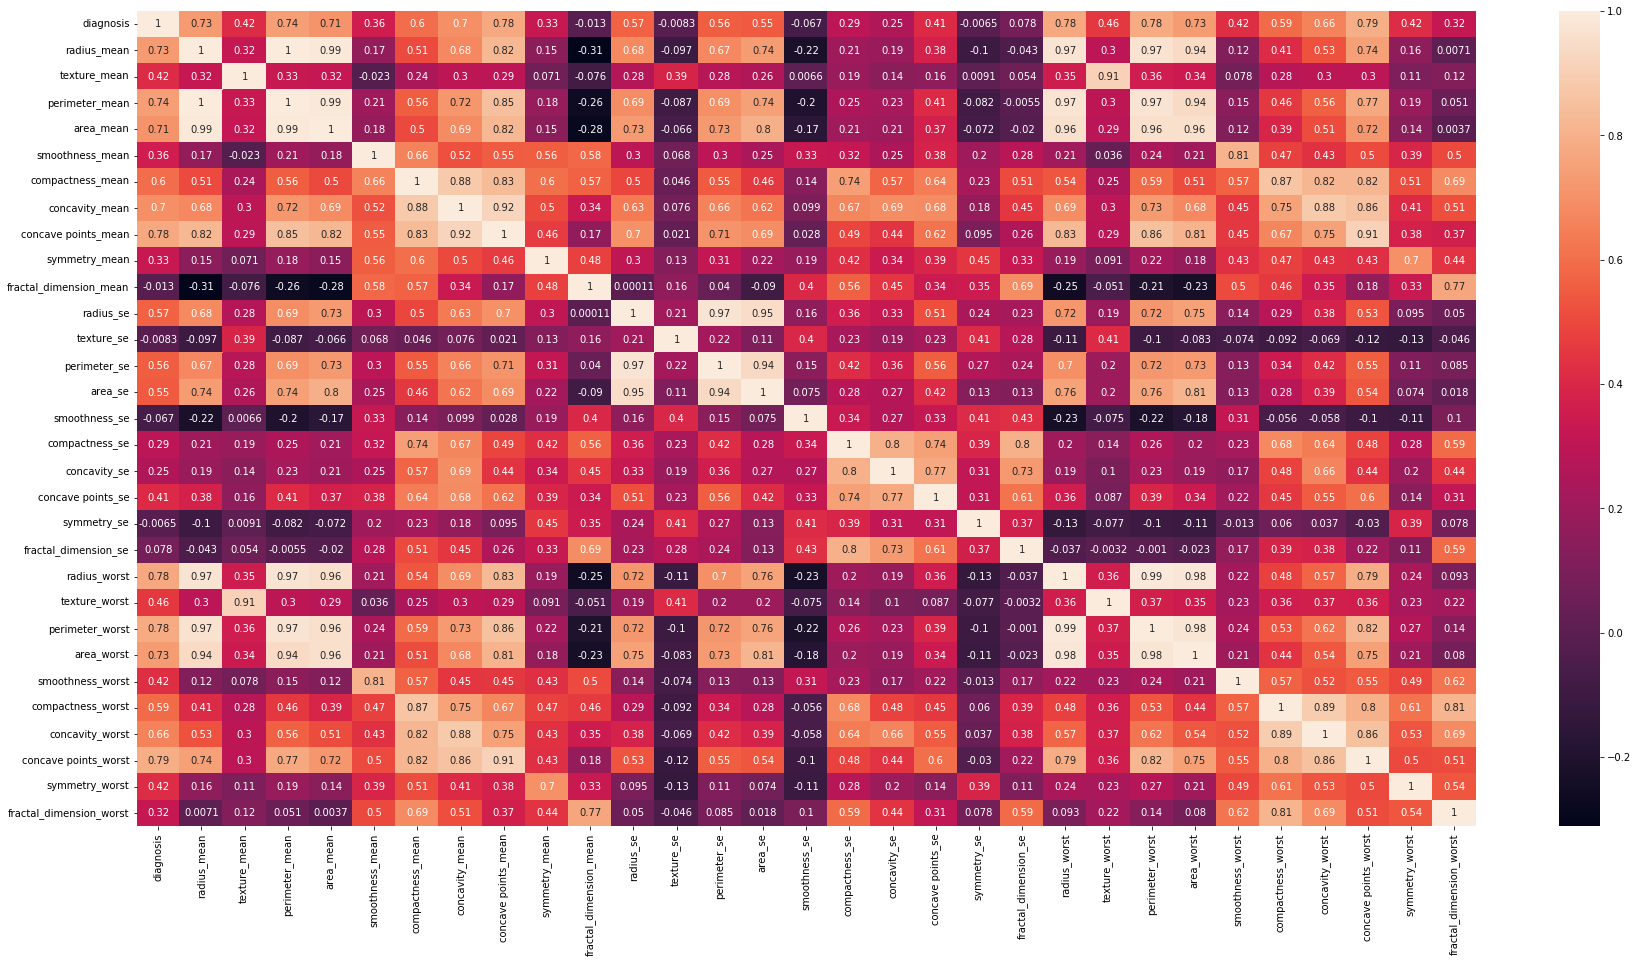

In [111]:
plt.figure(figsize = (30, 15))
sns.heatmap(df.corr(),annot=True)

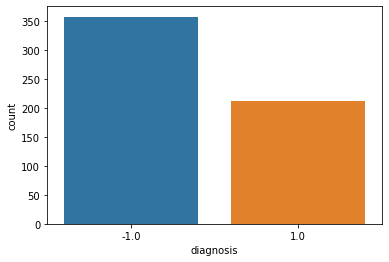

In [112]:
#We will use a countplot to visualize the count of observations for ‘diagnosis’ column.
sns.countplot(x ='diagnosis', data = df)

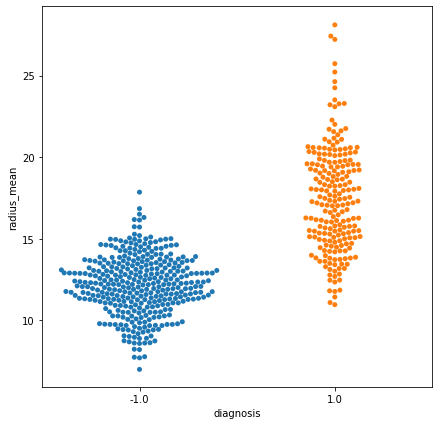

In [113]:
plt.figure(figsize=(7,7))
sns.swarmplot(x='diagnosis' ,y = 'radius_mean', data = df)
plt.show()

#### Dividing the dataset into features and targets

In [114]:
X = df.iloc[:, 1:]
y = df.loc[:, 'diagnosis']

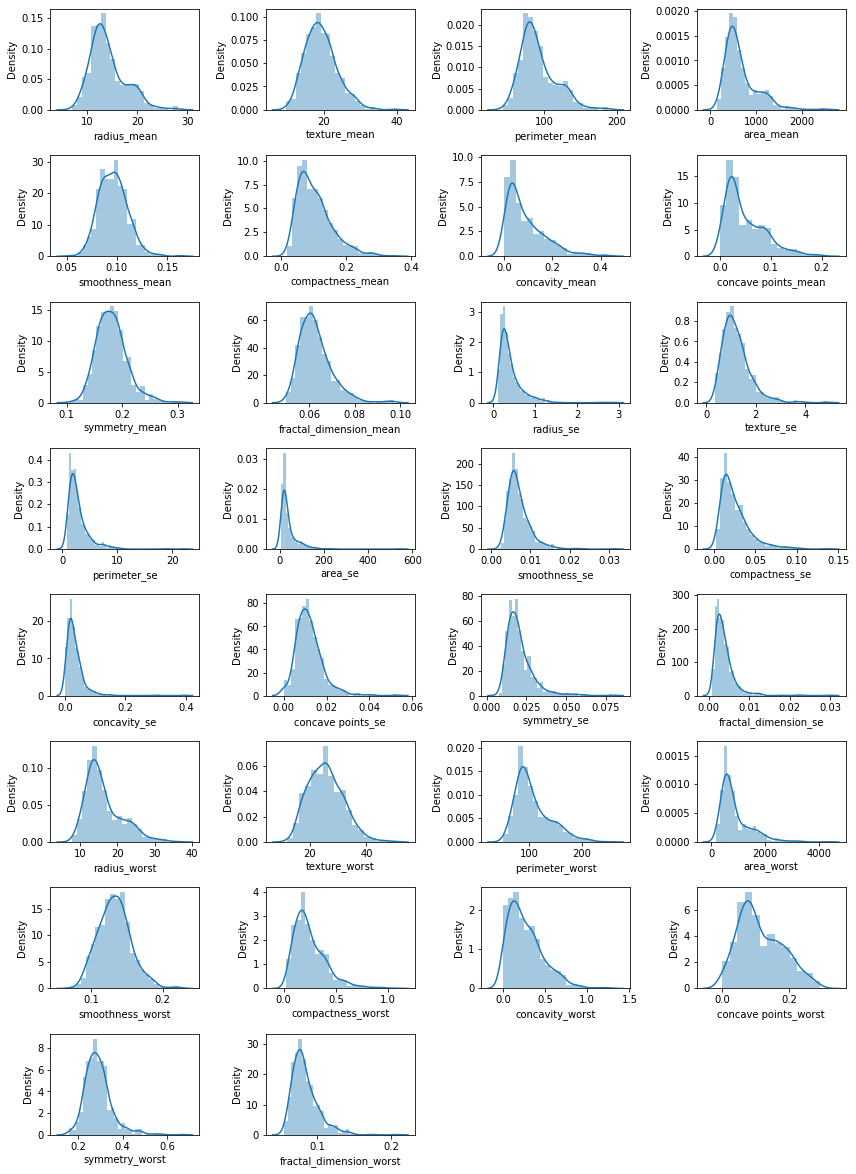

In [115]:
fig = plt.figure(figsize=(12,18))
for i in range(len(X.columns)):
    fig.add_subplot(9,4,i+1)
    sns.distplot(X.iloc[:,i], kde=True, hist=True)
    plt.xlabel(X.columns[i])
plt.tight_layout()
plt.show()

#### Normalize the feature vectors

In [116]:
from sklearn.preprocessing import MinMaxScaler

In [117]:
X_normalized = MinMaxScaler().fit_transform(X.values)
X = pd.DataFrame(X_normalized)

## Hard SVM using Quadratic Programming

In [118]:
from sklearn.svm import SVC
from cvxopt import matrix as cvxopt_matrix
from cvxopt import solvers as cvxopt_solvers

In [119]:
#initialize
m,n = X.shape
w = np.array([1,-1]).reshape(-1,1)
b = -3
y = y.values.reshape(-1,1) * 1.
X_dash = y * X
H = np.dot(X_dash , X_dash.T) * 1.

P = cvxopt_matrix(H)
q = cvxopt_matrix(-np.ones((m, 1)))
G = cvxopt_matrix(-np.eye(m))
h = cvxopt_matrix(np.zeros(m))
A = cvxopt_matrix(y.reshape(1, -1))
b = cvxopt_matrix(np.zeros(1))

cvxopt_solvers.options['show_progress'] = False
cvxopt_solvers.options['abstol'] = 1e-10
cvxopt_solvers.options['reltol'] = 1e-10
cvxopt_solvers.options['feastol'] = 1e-10

#results
result = cvxopt_solvers.qp(P, q, G, h, A, b)
a = np.array(result['x'])

In [120]:
w = ((y * a).T @ X).values.reshape(-1,1)
S = (a > 1e-4).flatten()
b = y[S] - np.dot(X[S], w)

#printing the results
print('alpha = ',a[a > 1e-4])
print('w = ', w.flatten())
print('b = ', b[0])

alpha =  [1228756.60187186 2395124.43070829  153080.98638039 1179849.24345807
   87777.84917393  180380.78997877  236449.63811092 2601004.19099418
  471580.46090709  375432.23906255 1055163.67517355  145241.32029241
   92539.8001405   187371.84916993    7592.220895   2260022.29872137
 1507786.77984362 1120949.76511031   34608.70672942   89713.45229767
  333131.28530981   87496.49809922 2988437.82448679   64912.20704504
  761271.66595992  666595.71593712 1686909.12796589   45948.92299037
 1473840.34772528  587712.07056   ]
w =  [-2972.25175013   151.14864853   169.68876592  2691.33248422
   106.2407014   -749.19914004   746.12068959   152.20004065
  -174.67995327   156.39875718  1069.99353193   -89.18469525
 -1014.14272147  1101.7782492   -153.33924024   418.46560137
 -1123.26062316   660.00289671  -307.3354003   -715.77813692
   417.01173704   113.43511185   552.36364519   235.24166159
    51.61625208  -131.37648646    28.06344521   143.82201128
   456.45606463   274.10189985]
b =  [-2

## Soft SVM using Quadratic Programming

In [121]:
from sklearn.svm import SVC
from cvxopt import matrix as cvxopt_matrix
from cvxopt import solvers as cvxopt_solvers

df = pd.read_csv('breast-cancer.csv')
df.drop(df.columns[[-1, 0]], axis=1, inplace=True)
d = {'M': 1.0, 'B': -1.0}
df['diagnosis'] = df['diagnosis'].map(d)

y = df.loc[:, 'diagnosis']
X = df.iloc[:, 1:]

X_normalized = MinMaxScaler().fit_transform(X.values)
X = pd.DataFrame(X_normalized)

#initialize
C = 10
m,n = X.shape
y = y.values.reshape(-1,1) * 1.
X_dash = y * X
H = np.dot(X_dash , X_dash.T) * 1.


P = cvxopt_matrix(H)
q = cvxopt_matrix(-np.ones((m, 1)))
G = cvxopt_matrix(np.vstack((np.eye(m)*-1,np.eye(m))))
h = cvxopt_matrix(np.hstack((np.zeros(m), np.ones(m) * C)))
A = cvxopt_matrix(y.reshape(1, -1))
b = cvxopt_matrix(np.zeros(1))

#results
sol = cvxopt_solvers.qp(P, q, G, h, A, b)
a = np.array(sol['x'])



In [122]:
w = ((y * a).T @ X).values.reshape(-1,1)
S = (a > 1e-4).flatten()
b = y[S] - np.dot(X[S], w)

#printing the results
print('alpha = ',a[a > 1e-4])
print('w = ', w.flatten())
print('b = ', b[0])

alpha =  [10.         10.         10.         10.         10.          1.88248856
 10.          4.27495127 10.         10.         10.         10.
 10.         10.         10.         10.          6.18216837 10.
  3.37753995 10.          1.38528379  4.27266195 10.         10.
 10.          1.50046421 10.         10.         10.         10.
  2.15972883 10.         10.         10.         10.         10.
 10.         10.         10.         10.         10.          2.51585411
  6.36236464 10.          2.90204197  9.90014033 10.         10.
 10.         10.         10.          4.80498334]
w =  [ 1.16927864  1.77334701  1.22149636  1.36782828 -0.7439444  -1.80473702
  3.24450252  3.14454841  0.73799816 -1.88996063  3.9560072  -0.48977356
  3.40499679  2.50263755  1.34590681 -2.55485407 -1.22041733  0.80689561
 -0.7655243  -1.35898966  2.95628599  3.3364893   2.9809676   2.6094091
  2.37756771 -0.78188976  2.44355083  2.0967466   3.28461431  1.67355832]
b =  [-9.1332298]


## Comparing to Sklearn results

In [123]:
clf = SVC(C = 10, kernel = 'linear')
clf.fit(X, y.ravel()) 

print('w = ',clf.coef_)
print('b = ',clf.intercept_)
print('Indices of support vectors = ', clf.support_)
print('Support vectors = ', clf.support_vectors_)
print('Number of support vectors for each class = ', clf.n_support_)
print('Coefficients of the support vector in the decision function = ', np.abs(clf.dual_coef_))

w =  [[ 1.16825406  1.7735964   1.22044824  1.36716953 -0.74564021 -1.80621324
   3.24192606  3.14481342  0.74025135 -1.89066016  3.95685954 -0.48968162
   3.40737174  2.50308979  1.34467482 -2.55201615 -1.22083727  0.80821023
  -0.76486959 -1.3612192   2.95614827  3.33645575  2.98175951  2.61011209
   2.37887799 -0.78284151  2.4436352   2.10202448  3.28151308  1.67236536]]
b =  [-9.48453564]
Indices of support vectors =  [ 49  68  81  89 133 157 208 225 238 291 340 363 396 413 455 456 466 469
 484 491 508 526 541 542 560  13  38  39  40  41  44  73  86  91  99 135
 146 171 184 190 194 197 205 213 215 255 261 263 297 489 514 536]
Support vectors =  [[0.30806001 0.42576936 0.29797526 ... 0.44054983 0.25744136 0.09268005]
 [0.09692839 0.25769361 0.10365559 ... 0.60137457 0.52493594 0.40968123]
 [0.30096076 0.20798106 0.2950729  ... 0.58694158 0.3867534  0.30539158]
 ...
 [0.45951063 0.35475144 0.43749568 ... 0.30024055 0.61344372 0.13898728]
 [0.38189219 0.31653703 0.36949762 ... 0.38487

## Optimization using Stochastic Gradient Descent with the split 70:30

In [124]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.metrics import confusion_matrix
from sklearn.utils import shuffle

def find_cost(W, X, Y):
    N = X.shape[0]
    distances = 1 - Y * (np.dot(X, W))
    distances[distances < 0] = 0
    hinge_loss = regularization * (np.sum(distances) / N)     #calculating the hinge loss
    cost = 1 / 2 * np.dot(W, W) + hinge_loss
    return cost

def find_cost_gradient(W, X_batch, Y_batch):
    if type(Y_batch) == np.float64:
        Y_batch = np.array([Y_batch])
        X_batch = np.array([X_batch])  

    distance = 1 - (Y_batch * np.dot(X_batch, W))
    dw = np.zeros(len(W))

    for ind, d in enumerate(distance):
        if max(0, d) == 0:
            di = W
        else:
            di = W - (regularization * Y_batch[ind] * X_batch[ind])
        dw += di

    dw = dw/len(Y_batch)
    return dw


def SGD(features, outputs):
    max_epochs = 5000
    weights = np.zeros(features.shape[1])
    nth = 0
    prev_cost = float("inf")
    cost_threshold = 0.01  
    for epoch in range(1, max_epochs):
        X, Y = shuffle(features, outputs)
        for ind, x in enumerate(X):
            ascent = find_cost_gradient(weights, x, Y[ind])
            weights = weights - (alpha * ascent)
        if epoch == 2 ** nth or epoch == max_epochs - 1:
            cost = find_cost(weights, features, outputs)
            print("Epoch: {} \t Cost: {}".format(epoch, cost))
            # stoppage criterion
            if abs(prev_cost - cost) < cost_threshold * prev_cost:
                return weights
            prev_cost = cost
            nth += 1
    return weights

#feature selection
def delete_less_significant_features(X, Y):
    regression_ols = None
    sl = 0.05
    columns_dropped = np.array([])
    for itr in range(0, len(X.columns)):
        regression_ols = sm.OLS(Y, X).fit()
        max_col = regression_ols.pvalues.idxmax()
        max_val = regression_ols.pvalues.max()
        if max_val > sl:
            X.drop(max_col, axis='columns', inplace=True)
            columns_dropped = np.append(columns_dropped, [max_col])
        else:
            break
    regression_ols.summary()
    return columns_dropped


def delete_correlated_features(X):
    corr = X.corr()
    corr_threshold = 0.9
    drop_columns = np.full(corr.shape[0], False, dtype=bool)
    for i in range(corr.shape[0]):
        for j in range(i + 1, corr.shape[0]):
            if corr.iloc[i, j] >= corr_threshold:
                drop_columns[j] = True
    columns_dropped = X.columns[drop_columns]
    X.drop(columns_dropped, axis=1, inplace=True)
    return columns_dropped


def init():
    data = pd.read_csv('breast-cancer.csv')
    data.drop(data.columns[[-1, 0]], axis=1, inplace=True)
    d = {'M': 1.0, 'B': -1.0}
    data['diagnosis'] = data['diagnosis'].map(d)
    Y = data.loc[:, 'diagnosis']
    X = data.iloc[:, 1:]
    
    delete_correlated_features(X)
    delete_less_significant_features(X, Y)
    
    X_norm = MinMaxScaler().fit_transform(X.values)
    X = pd.DataFrame(X_norm)
    X.insert(loc=len(X.columns), column='intercept', value=1)
    X_train, X_test, y_train, y_test = tts(X, Y, test_size=0.3, random_state=42)
    W = SGD(X_train.to_numpy(), y_train.to_numpy())
    print("weights are: {}".format(W))
    
    y_pred = np.array([])
    for i in range(X_train.shape[0]):
        yp = np.sign(np.dot(X_train.to_numpy()[i], W))
        y_pred = np.append(y_pred, yp)
    y_testpred = np.array([])
    for i in range(X_test.shape[0]):
        yp = np.sign(np.dot(X_test.to_numpy()[i], W))
        y_testpred = np.append(y_testpred, yp)
    print("Accuracy: {}".format(accuracy_score(y_test, y_testpred)))
    print("Precision: {}".format(precision_score(y_test, y_testpred)))
    print("Recall: {}".format(recall_score(y_test, y_testpred)))
    print("Confusion matrix: \n{}".format(confusion_matrix(y_test, y_testpred)))

regularization = 10000
alpha = 0.000001
init()

Epoch: 1 	 Cost: 7399.832559896813
Epoch: 2 	 Cost: 6751.436779279762
Epoch: 4 	 Cost: 5856.215867964625
Epoch: 8 	 Cost: 4187.130364186473
Epoch: 16 	 Cost: 2900.66957717536
Epoch: 32 	 Cost: 2121.4494248613496
Epoch: 64 	 Cost: 1645.871123557497
Epoch: 128 	 Cost: 1367.9520390662085
Epoch: 256 	 Cost: 1168.9112475778934
Epoch: 512 	 Cost: 1072.3039501344529
Epoch: 1024 	 Cost: 1040.619134754736
Epoch: 2048 	 Cost: 1036.336633919048
weights are: [ 3.60677853 10.65908839 -2.20299131 -7.75774657 10.13116274 -2.25041295
 -2.12912556  2.72263207 -5.0477377   3.36362409  5.74776325  4.71801827
 -5.20694037]
Accuracy: 0.9707602339181286
Precision: 0.9833333333333333
Recall: 0.9365079365079365
Confusion matrix: 
[[107   1]
 [  4  59]]


## Optimization using Stochastic Gradient Descent with the split 80:20

In [125]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.metrics import confusion_matrix
from sklearn.utils import shuffle

def find_cost(W, X, Y):
    N = X.shape[0]
    distances = 1 - Y * (np.dot(X, W))
    distances[distances < 0] = 0
    hinge_loss = regularization * (np.sum(distances) / N)     #calculating the hinge loss
    cost = 1 / 2 * np.dot(W, W) + hinge_loss
    return cost

def find_cost_gradient(W, X_batch, Y_batch):
    if type(Y_batch) == np.float64:
        Y_batch = np.array([Y_batch])
        X_batch = np.array([X_batch])  

    distance = 1 - (Y_batch * np.dot(X_batch, W))
    dw = np.zeros(len(W))

    for ind, d in enumerate(distance):
        if max(0, d) == 0:
            di = W
        else:
            di = W - (regularization * Y_batch[ind] * X_batch[ind])
        dw += di

    dw = dw/len(Y_batch)
    return dw


def SGD(features, outputs):
    max_epochs = 5000
    weights = np.zeros(features.shape[1])
    nth = 0
    prev_cost = float("inf")
    cost_threshold = 0.01  
    for epoch in range(1, max_epochs):
        X, Y = shuffle(features, outputs)
        for ind, x in enumerate(X):
            ascent = find_cost_gradient(weights, x, Y[ind])
            weights = weights - (alpha * ascent)
        if epoch == 2 ** nth or epoch == max_epochs - 1:
            cost = find_cost(weights, features, outputs)
            print("Epoch: {} \t Cost: {}".format(epoch, cost))
            # stoppage criterion
            if abs(prev_cost - cost) < cost_threshold * prev_cost:
                return weights
            prev_cost = cost
            nth += 1
    return weights

#feature selection
def delete_less_significant_features(X, Y):
    regression_ols = None
    sl = 0.05
    columns_dropped = np.array([])
    for itr in range(0, len(X.columns)):
        regression_ols = sm.OLS(Y, X).fit()
        max_col = regression_ols.pvalues.idxmax()
        max_val = regression_ols.pvalues.max()
        if max_val > sl:
            X.drop(max_col, axis='columns', inplace=True)
            columns_dropped = np.append(columns_dropped, [max_col])
        else:
            break
    regression_ols.summary()
    return columns_dropped


def delete_correlated_features(X):
    corr = X.corr()
    corr_threshold = 0.9
    drop_columns = np.full(corr.shape[0], False, dtype=bool)
    for i in range(corr.shape[0]):
        for j in range(i + 1, corr.shape[0]):
            if corr.iloc[i, j] >= corr_threshold:
                drop_columns[j] = True
    columns_dropped = X.columns[drop_columns]
    X.drop(columns_dropped, axis=1, inplace=True)
    return columns_dropped


def init():
    data = pd.read_csv('breast-cancer.csv')
    data.drop(data.columns[[-1, 0]], axis=1, inplace=True)
    d = {'M': 1.0, 'B': -1.0}
    data['diagnosis'] = data['diagnosis'].map(d)
    Y = data.loc[:, 'diagnosis']
    X = data.iloc[:, 1:]
    
    delete_correlated_features(X)
    delete_less_significant_features(X, Y)
    
    X_norm = MinMaxScaler().fit_transform(X.values)
    X = pd.DataFrame(X_norm)
    X.insert(loc=len(X.columns), column='intercept', value=1)
    X_train, X_test, y_train, y_test = tts(X, Y, test_size=0.2, random_state=42)
    W = SGD(X_train.to_numpy(), y_train.to_numpy())
    print("weights are: {}".format(W))
    
    y_pred = np.array([])
    for i in range(X_train.shape[0]):
        yp = np.sign(np.dot(X_train.to_numpy()[i], W))
        y_pred = np.append(y_pred, yp)
    y_testpred = np.array([])
    for i in range(X_test.shape[0]):
        yp = np.sign(np.dot(X_test.to_numpy()[i], W))
        y_testpred = np.append(y_testpred, yp)
    print("Accuracy: {}".format(accuracy_score(y_test, y_testpred)))
    print("Precision: {}".format(precision_score(y_test, y_testpred)))
    print("Recall: {}".format(recall_score(y_test, y_testpred)))
    print("Confusion matrix: \n{}".format(confusion_matrix(y_test, y_testpred)))

regularization = 10000
alpha = 0.000001
init()

Epoch: 1 	 Cost: 7230.732593240878
Epoch: 2 	 Cost: 6562.2075446707
Epoch: 4 	 Cost: 5445.554163947798
Epoch: 8 	 Cost: 3838.771540857193
Epoch: 16 	 Cost: 2690.6905759289098
Epoch: 32 	 Cost: 1968.6805905690553
Epoch: 64 	 Cost: 1601.5992346088562
Epoch: 128 	 Cost: 1325.6274688954459
Epoch: 256 	 Cost: 1159.156994479306
Epoch: 512 	 Cost: 1075.6097562292828
Epoch: 1024 	 Cost: 1046.848343674699
Epoch: 2048 	 Cost: 1047.476255577416
weights are: [ 3.56581776 11.0495944  -2.28646212 -7.88853489 10.16823216 -1.28341601
 -6.43839255  2.27112647 -3.88155491  3.23636524  4.93145799  4.84662462
 -4.69659892]
Accuracy: 0.9912280701754386
Precision: 1.0
Recall: 0.9767441860465116
Confusion matrix: 
[[71  0]
 [ 1 42]]


## Optimization using Stochastic Gradient Descent with the split 90:10

In [126]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.metrics import confusion_matrix
from sklearn.utils import shuffle

def find_cost(W, X, Y):
    N = X.shape[0]
    distances = 1 - Y * (np.dot(X, W))
    distances[distances < 0] = 0
    hinge_loss = regularization * (np.sum(distances) / N)     #calculating the hinge loss
    cost = 1 / 2 * np.dot(W, W) + hinge_loss
    return cost

def find_cost_gradient(W, X_batch, Y_batch):
    if type(Y_batch) == np.float64:
        Y_batch = np.array([Y_batch])
        X_batch = np.array([X_batch])  

    distance = 1 - (Y_batch * np.dot(X_batch, W))
    dw = np.zeros(len(W))

    for ind, d in enumerate(distance):
        if max(0, d) == 0:
            di = W
        else:
            di = W - (regularization * Y_batch[ind] * X_batch[ind])
        dw += di

    dw = dw/len(Y_batch)
    return dw


def SGD(features, outputs):
    max_epochs = 5000
    weights = np.zeros(features.shape[1])
    nth = 0
    prev_cost = float("inf")
    cost_threshold = 0.01  
    for epoch in range(1, max_epochs):
        X, Y = shuffle(features, outputs)
        for ind, x in enumerate(X):
            ascent = find_cost_gradient(weights, x, Y[ind])
            weights = weights - (alpha * ascent)
        if epoch == 2 ** nth or epoch == max_epochs - 1:
            cost = find_cost(weights, features, outputs)
            print("Epoch: {} \t Cost: {}".format(epoch, cost))
            # stoppage criterion
            if abs(prev_cost - cost) < cost_threshold * prev_cost:
                return weights
            prev_cost = cost
            nth += 1
    return weights

#feature selection
def delete_less_significant_features(X, Y):
    regression_ols = None
    sl = 0.05
    columns_dropped = np.array([])
    for itr in range(0, len(X.columns)):
        regression_ols = sm.OLS(Y, X).fit()
        max_col = regression_ols.pvalues.idxmax()
        max_val = regression_ols.pvalues.max()
        if max_val > sl:
            X.drop(max_col, axis='columns', inplace=True)
            columns_dropped = np.append(columns_dropped, [max_col])
        else:
            break
    regression_ols.summary()
    return columns_dropped


def delete_correlated_features(X):
    corr = X.corr()
    corr_threshold = 0.9
    drop_columns = np.full(corr.shape[0], False, dtype=bool)
    for i in range(corr.shape[0]):
        for j in range(i + 1, corr.shape[0]):
            if corr.iloc[i, j] >= corr_threshold:
                drop_columns[j] = True
    columns_dropped = X.columns[drop_columns]
    X.drop(columns_dropped, axis=1, inplace=True)
    return columns_dropped


def init():
    data = pd.read_csv('breast-cancer.csv')
    data.drop(data.columns[[-1, 0]], axis=1, inplace=True)
    d = {'M': 1.0, 'B': -1.0}
    data['diagnosis'] = data['diagnosis'].map(d)
    Y = data.loc[:, 'diagnosis']
    X = data.iloc[:, 1:]
    
    delete_correlated_features(X)
    delete_less_significant_features(X, Y)
    
    X_norm = MinMaxScaler().fit_transform(X.values)
    X = pd.DataFrame(X_norm)
    X.insert(loc=len(X.columns), column='intercept', value=1)
    X_train, X_test, y_train, y_test = tts(X, Y, test_size=0.1, random_state=42)
    W = SGD(X_train.to_numpy(), y_train.to_numpy())
    print("weights are: {}".format(W))
    
    y_pred = np.array([])
    for i in range(X_train.shape[0]):
        yp = np.sign(np.dot(X_train.to_numpy()[i], W))
        y_pred = np.append(y_pred, yp)
    y_testpred = np.array([])
    for i in range(X_test.shape[0]):
        yp = np.sign(np.dot(X_test.to_numpy()[i], W))
        y_testpred = np.append(y_testpred, yp)
    print("Accuracy: {}".format(accuracy_score(y_test, y_testpred)))
    print("Precision: {}".format(precision_score(y_test, y_testpred)))
    print("Recall: {}".format(recall_score(y_test, y_testpred)))
    print("Confusion matrix: \n{}".format(confusion_matrix(y_test, y_testpred)))

regularization = 10000
alpha = 0.000001
init()

Epoch: 1 	 Cost: 7230.1450763830135
Epoch: 2 	 Cost: 6434.928521739866
Epoch: 4 	 Cost: 5078.160474908462
Epoch: 8 	 Cost: 3453.6115750639265
Epoch: 16 	 Cost: 2458.921763845021
Epoch: 32 	 Cost: 1875.344120818787
Epoch: 64 	 Cost: 1485.790231673631
Epoch: 128 	 Cost: 1234.6747823159772
Epoch: 256 	 Cost: 1093.6679399543432
Epoch: 512 	 Cost: 1024.894860712994
Epoch: 1024 	 Cost: 1003.9193946804896
Epoch: 2048 	 Cost: 998.6060781343036
weights are: [ 3.41578899 11.11668068 -1.85422547 -8.38415446 10.26055746 -1.50258479
 -6.01854532  2.28008883 -3.48893006  3.50290774  4.71249605  4.99328902
 -4.88814363]
Accuracy: 0.9824561403508771
Precision: 1.0
Recall: 0.9411764705882353
Confusion matrix: 
[[40  0]
 [ 1 16]]


## SVM (Soft SVM Formulation) Different Regularization

In [127]:
df = pd.read_csv('breast-cancer.csv')
df.drop(df.columns[[-1, 0]], axis=1, inplace=True)
d = {'M': 1.0, 'B': -1.0}
df['diagnosis'] = df['diagnosis'].map(d)
y = df.loc[:, 'diagnosis']
X = df.iloc[:, 1:]
X_norm = MinMaxScaler().fit_transform(X.values)
X = pd.DataFrame(X_norm)
Regularize = pd.DataFrame(columns=['Regularization Parameter','Accuracy','F1 score','Support Vectors'])

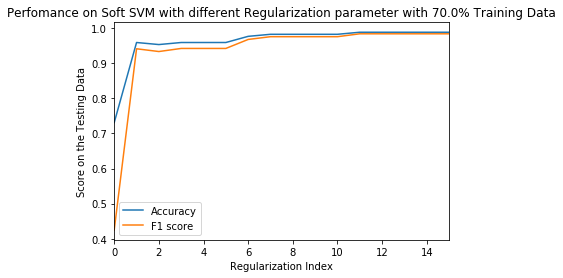

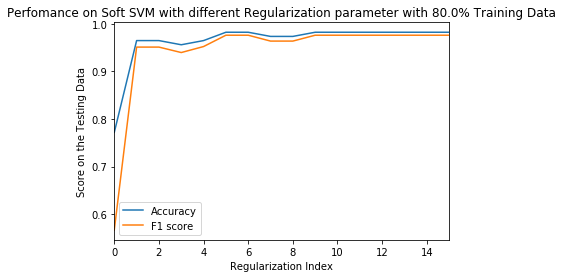

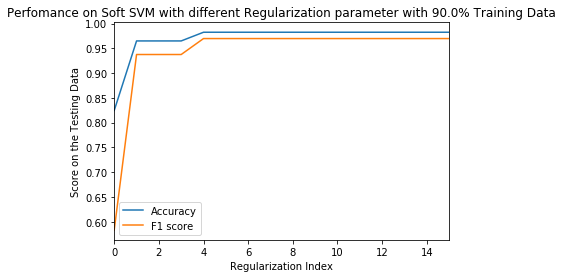

In [128]:
from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

L=[]
for T in [0.3,0.2,0.1]:
  Regularize = pd.DataFrame(columns=['Regularization Parameter','Accuracy','F1 score','Support Vectors'])
  for c in np.arange(0.1,16,1):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=T, random_state=42) 
    SoftSVC=SVC(C=c)
    SoftSVC.fit(X_train,y_train)  
    acc=accuracy_score(y_test,SoftSVC.predict(X_test))
    f1=f1_score(y_test,SoftSVC.predict(X_test))
    Support=SoftSVC.n_support_
    dictionary={'Regularization Parameter':c,'Accuracy':acc,'F1 score':f1,'Support Vectors':Support}
    Regularize=Regularize.append(dictionary,ignore_index=True)
  L.append(Regularize)


i=0
lt=[0.7,0.8,0.9]
for X in L:
  X[['Accuracy','F1 score']].plot()
  plt.title("Perfomance on Soft SVM with different Regularization parameter with "+str(lt[i]*100)+"% Training Data")
  plt.xlabel("Regularization Index")
  plt.ylabel("Score on the Testing Data")
  i=i+1

In [129]:
i=0
for X in L:
  print("                   "+str(lt[i]*100) + "% Training Data\n")
  print(X)
  print()
  i=i+1


                   70.0% Training Data

    Regularization Parameter  Accuracy  F1 score Support Vectors
0                        0.1  0.730994  0.425000      [149, 149]
1                        1.1  0.959064  0.941176        [82, 83]
2                        2.1  0.953216  0.933333        [67, 67]
3                        3.1  0.959064  0.942149        [60, 59]
4                        4.1  0.959064  0.942149        [55, 54]
5                        5.1  0.959064  0.942149        [52, 52]
6                        6.1  0.976608  0.967742        [49, 48]
7                        7.1  0.982456  0.975610        [47, 45]
8                        8.1  0.982456  0.975610        [44, 45]
9                        9.1  0.982456  0.975610        [44, 44]
10                      10.1  0.982456  0.975610        [42, 43]
11                      11.1  0.988304  0.983871        [42, 40]
12                      12.1  0.988304  0.983871        [42, 39]
13                      13.1  0.988304  0.983871  